In [4]:
import geopandas as gpd

# Cluster Sampling

In [ ]:
from cluster_sampling import ClusterSampler

In [ ]:
data_path = "/share/india_secc/MOSAIKS/train_shrugs_with_admins.geojson"
gdf = gpd.read_file(data_path)

country_shape_file = '/home/libe2152/optimizedsampling/0_data/boundaries/world/ne_10m_admin_0_countries.shp'
country_name = 'India'

strata_col = 'pc11_s_id'
cluster_col = 'pc11_d_id'

out_path = f'/home/libe2152/optimizedsampling/0_data/initial_samples/india_secc/cluster_sampling'

sampler = ClusterSampler(gdf, id_col='condensed_shrug_id', strata_col=strata_col, cluster_col=cluster_col, ADMIN_IDS=ADMIN_IDS)

for points_per_cluster in [2, 5, 10, 25]:
    sampler.cluster_col = cluster_col
    #sampler.merge_small_strata(points_per_cluster)
    #sampler.merge_small_clusters(points_per_cluster)
    for total_sample_size in range(100, 1100, 100):
        
        for seed in [1, 42, 123, 456, 789, 1234, 5678, 9101, 1213, 1415]:
            try:
                sampler.sample(total_sample_size, points_per_cluster, seed=seed)
                sampler.save_sampled_ids(out_path)
                sampler.plot(country_shape_file=country_shape_file, country_name=country_name)
            except Exception as e:
                print(e)
                from IPython import embed; embed()
            sampler.reset_sample()

# Convenience Sampling

In [5]:
from convenience_sampling import UrbanConvenienceSampler, RegionConvenienceSampler

Reading GeoDataFrame...
Initializing UrbanConvenienceSampler...
Loading precomputed distances from /home/libe2152/optimizedsampling/0_data/distances/india_secc/distance_to_top50_urban.pkl...
Running probabilistic sampling...
Saved 10 sampled IDs to /home/libe2152/optimizedsampling/0_data/initial_samples/india_secc/convenience_sampling/IDS_top50_urban_10_points_probabilistic_seed_1.pkl


/home/libe2152/optimizedsampling/2_initial_sample/convenience_sampling.py:113: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='lower left', fontsize=10, title='Legend', title_fontsize=11, frameon=True)
/home/libe2152/optimizedsampling/2_initial_sample/convenience_sampling.py:113: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower left', fontsize=10, title='Legend', title_fontsize=11, frameon=True)


Saved plot to /home/libe2152/optimizedsampling/0_data/initial_samples/india_secc/convenience_sampling/urban_based/plots/top50_urban_areas_10_points_probabilistic_seed_1.png
Initializing RegionConvenienceSampler...
[Init] Initializing ClusterSampler...
[Determine Regions] Stratifying points by column: pc11_s_id
[Determine Region] Unique regions found: ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '14' '18' '19'
 '20' '21' '22' '23' '24' '25' '27' '28' '29' '30' '33' '34' '16' '17']
[Init] Found 28 regions.
[Sample] Starting sampling process...
[Sample] Sampling complete. Total points sampled: 10
Saved 10 sampled IDs to /home/libe2152/optimizedsampling/0_data/initial_samples/india_secc/convenience_sampling/region_based/IDS_region_28_10_points_seed_1.pkl


/home/libe2152/optimizedsampling/2_initial_sample/convenience_sampling.py:209: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='lower left', fontsize=10, title='Legend', title_fontsize=11, frameon=True)
/home/libe2152/optimizedsampling/2_initial_sample/convenience_sampling.py:209: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower left', fontsize=10, title='Legend', title_fontsize=11, frameon=True)


Saved plot to /home/libe2152/optimizedsampling/0_data/initial_samples/india_secc/convenience_sampling/region_based/plots/region_28_10_points_seed_1.png
Initializing UrbanConvenienceSampler...
Loading precomputed distances from /home/libe2152/optimizedsampling/0_data/distances/india_secc/distance_to_top50_urban.pkl...
Running probabilistic sampling...
Saved 10 sampled IDs to /home/libe2152/optimizedsampling/0_data/initial_samples/india_secc/convenience_sampling/IDS_top50_urban_10_points_probabilistic_seed_42.pkl


/home/libe2152/optimizedsampling/2_initial_sample/convenience_sampling.py:113: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='lower left', fontsize=10, title='Legend', title_fontsize=11, frameon=True)
/home/libe2152/optimizedsampling/2_initial_sample/convenience_sampling.py:113: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower left', fontsize=10, title='Legend', title_fontsize=11, frameon=True)


Saved plot to /home/libe2152/optimizedsampling/0_data/initial_samples/india_secc/convenience_sampling/urban_based/plots/top50_urban_areas_10_points_probabilistic_seed_42.png
Initializing RegionConvenienceSampler...
[Init] Initializing ClusterSampler...
[Determine Regions] Stratifying points by column: pc11_s_id
[Determine Region] Unique regions found: ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '14' '18' '19'
 '20' '21' '22' '23' '24' '25' '27' '28' '29' '30' '33' '34' '16' '17']
[Init] Found 28 regions.
[Sample] Starting sampling process...
[Sample] Sampling complete. Total points sampled: 10
Saved 10 sampled IDs to /home/libe2152/optimizedsampling/0_data/initial_samples/india_secc/convenience_sampling/region_based/IDS_region_28_10_points_seed_42.pkl


/home/libe2152/optimizedsampling/2_initial_sample/convenience_sampling.py:209: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='lower left', fontsize=10, title='Legend', title_fontsize=11, frameon=True)
/home/libe2152/optimizedsampling/2_initial_sample/convenience_sampling.py:209: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower left', fontsize=10, title='Legend', title_fontsize=11, frameon=True)


KeyboardInterrupt: 

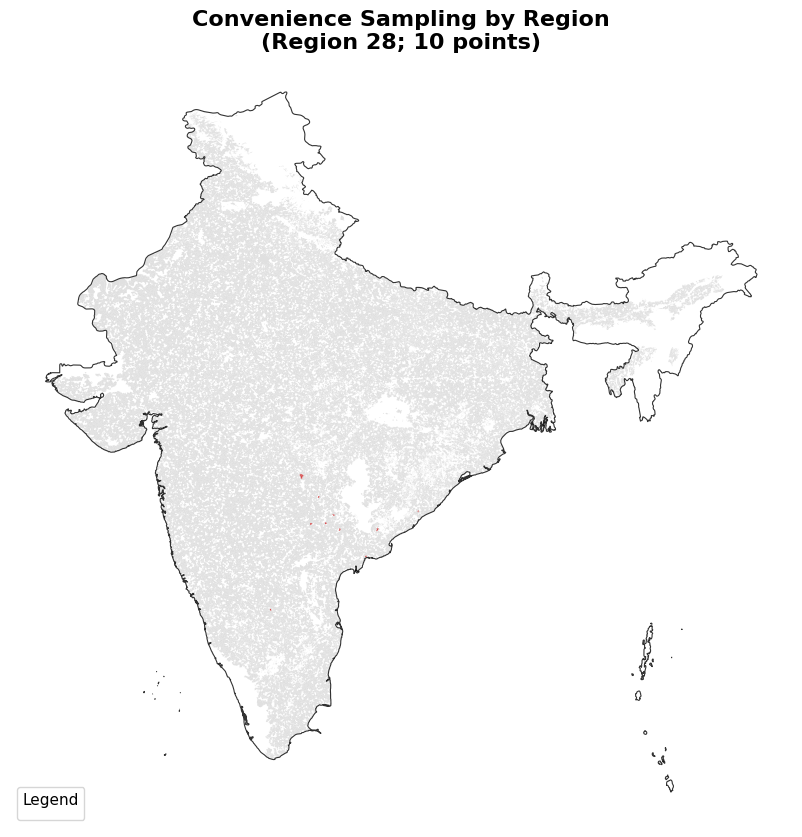

In [ ]:
ADMIN_IDS = {
    'pc11_s_id': 'state',
    'pc11_d_id': 'district',
    'pc11_sd_id': 'subdistrict'
}

id_col = 'condensed_shrug_id'
gdf_path = '/share/india_secc/MOSAIKS/train_shrugs_with_admins.geojson'
n_urban = 50
pop_col = 'pc11_pca_tot_p_combined'
country_shape_file = '/home/libe2152/optimizedsampling/0_data/boundaries/world/ne_10m_admin_0_countries.shp'
country_name = 'India'
out_path = f'/home/libe2152/optimizedsampling/0_data/initial_samples/india_secc/convenience_sampling'
distances_dir = f'/home/libe2152/optimizedsampling/0_data/distances/india_secc/distance_to_top{n_urban}_urban.pkl'

print("Reading GeoDataFrame...")
gdf = gpd.read_file(gdf_path)

method = 'probabilistic'
temp=0.025
for desired_sample_size in range(100, 1100, 100):
    for seed in [1, 42, 123, 456, 789, 1234, 5678, 9101, 1213, 1415]:

        print("Initializing UrbanConvenienceSampler...")
        sampler = UrbanConvenienceSampler(
            id_col=id_col,
            gdf_points=gdf,
            gdf_urban=gdf,
            n_urban=n_urban,
            pop_col=pop_col,
            distances_dir=distances_dir
        )

        sampler.sample(n_samples=desired_sample_size, method=method, temp=temp, seed=seed)
        sampler.save_sampled_ids(out_path)
        sampler.plot(country_shape_file=country_shape_file, country_name=country_name)

        print("Initializing RegionConvenienceSampler...")
        sampler = RegionConvenienceSampler(
                gdf_points=gdf,
                id_col=id_col,
                region_col='pc11_s_id',
                ADMIN_IDS=ADMIN_IDS)

        sampler.sample(total_sample_size=desired_sample_size, region_val='28', seed=seed)
        sampler.save_sampled_ids(out_path)
        sampler.plot(country_shape_file=country_shape_file, country_name=country_name)

# Random Sampling

In [ ]:
from random_sampling import RandomSampler

In [ ]:
data_path = "/share/india_secc/MOSAIKS/train_shrugs_with_admins.geojson"
gdf = gpd.read_file(data_path)

out_path = f'/home/libe2152/optimizedsampling/0_data/initial_samples/india_secc/random_sampling'

country_shape_file = '/home/libe2152/optimizedsampling/0_data/boundaries/world/ne_10m_admin_0_countries.shp'
country_name = 'India'

sampler = RandomSampler(gdf, id_col="condensed_shrug_id")

for total_sample_size in range(100, 1100, 100):
    for seed in [1, 42, 123, 456, 789, 1234, 5678, 9101, 1213, 1415]:
        sampler.sample(total_sample_size=total_sample_size, seed=seed)
        sampler.save_sampled_ids(out_path)
        sampler.plot(country_shape_file=country_shape_file, country_name=country_name)
        sampler.reset_sample()